## Loading dependencies

In [390]:
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline  ###learn

UsageError: unrecognized arguments: ###learn


In [391]:
#make all plots 538 style
plt.style.use('fivethirtyeight')

## Retrieving Data

In [392]:
#loading the data
employee_data=pd.read_csv('employee_retention.csv')
employee_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,5461,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,21162,4,marketing,14,101000.0,2014-10-13,NaN
3,22093,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,13586,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [393]:
#knowing the data types for each column
employee_data.dtypes

employee_id      int64
company_id       int64
dept            object
seniority        int64
salary         float64
join_date       object
quit_date       object
dtype: object

In [394]:
# employee_data['join_date']=employee_data['join_date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%m:%s'))

In [395]:
import numpy as np
employee_data['quit_date']=employee_data['quit_date'].fillna(np.datetime64('2005-02-25'))

In [396]:
employee_data['quit_date']=pd.to_datetime(employee_data['quit_date'].astype(str),errors='coerce')
employee_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,5461,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,21162,4,marketing,14,101000.0,2014-10-13,2005-02-25
3,22093,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,13586,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [397]:
employee_data['join_date']=pd.to_datetime(employee_data['join_date'])

In [398]:
employee_data.dtypes

employee_id             int64
company_id              int64
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dtype: object

## 2. Cleaning Data
Steps:
1. Check the shape of the table

2. Check for null values

3. Deal with null values


### 1. Check the shape of the table


In [399]:
employee_data.shape

(24702, 7)

### 2. check for null values

In [400]:
employee_data.isna().sum()

employee_id    0
company_id     0
dept           0
seniority      0
salary         0
join_date      0
quit_date      0
dtype: int64

### 3. remove  null values

In [388]:
# employee_data['quit_date']=employee_data['quit_date'].replace('NaN','')
employee_data['quit_date']=employee_data['quit_date'].replace(np.datetime64('2005-02-25'),np.datetime64('2005-02-25'))
# employee_data = employee_data['col'].dt.strftime('%d.%m.%Y').replace('NaT','')

In [401]:
employee_data.dtypes

employee_id             int64
company_id              int64
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dtype: object

In [348]:
employee_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,5461,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,21162,4,marketing,14,101000.0,2014-10-13,NaT
3,22093,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,13586,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [402]:
import numpy as np
employee_data['quit_or_not']=[0 if i== np.datetime64('2005-02-25') else 1 for i in employee_data['quit_date']]

In [403]:
employee_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_or_not
0,13021,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,5461,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,21162,4,marketing,14,101000.0,2014-10-13,2005-02-25,0
3,22093,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,13586,2,data_science,23,276000.0,2011-10-17,2014-08-22,1


# 3.Feature Engineering

<b>Features:</b>

<u>Total Days Worked</u> - subtracting the quit_date from the join_date and for the people that didn't quit, we can subtract the date (12/13/2015) that the data was pulled from their join_date.

<u>Time Segmentation of Days Quit</u> - break it down by day, month, etc.

In [404]:
employee_data.shape[0]

24702

In [405]:
import datetime
days_worked=[]
end_date = datetime.datetime(2015, 12, 13)

In [406]:
def func_a():
    for i in range(len(employee_data)):
        if(employee_data['quit_or_not'][i]=='1'):
            days_worked.append(employee_data['quit_date'][i]-days_worked.employee_data['join_date'][i])
        else:
             days_worked.append(end_date-employee_data['join_date'][i])
        

In [407]:
func_a()

In [408]:
employee_data['days_on_job']=[i.days for i in days_worked]

In [409]:
employee_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_or_not,days_on_job
0,13021,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,629
1,5461,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,958
2,21162,4,marketing,14,101000.0,2014-10-13,2005-02-25,0,426
3,22093,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,1308
4,13586,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1518


In [124]:
type(employee_data['quit_date'])[0]

TypeError: 'type' object is not subscriptable

In [261]:
employee_data.dtypes

employee_id             int64
company_id              int64
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
quit_or_not             int64
days_on_job             int64
dtype: object

In [262]:
employee_data['week_quit'] = [i.isocalendar()[1]  for i in employee_data.quit_date ]

ValueError: NaTType does not support isocalendar

In [410]:
employee_data['week_quit'] = [i.isocalendar()[1] if type(i) == type(employee_data.quit_date[0]) else i for i in employee_data.quit_date ]
employee_data['month_quit'] = [i.strftime('%b') if type(i) == type(employee_data.quit_date[0]) else i for i in employee_data.quit_date ]
employee_data['day_quit'] = [i.strftime('%d') if type(i) == type(employee_data.quit_date[0]) else i for i in employee_data.quit_date ]



In [411]:
employee_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_or_not,days_on_job,week_quit,month_quit,day_quit
0,13021,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,629,44,Oct,30
1,5461,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,958,14,Apr,04
2,21162,4,marketing,14,101000.0,2014-10-13,2005-02-25,0,426,8,Feb,25
3,22093,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,1308,23,Jun,07
4,13586,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1518,34,Aug,22


# Data Exploration

### 1.Plotting days on job

In [412]:
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 25, 'font.size': 25, 'legend.fontsize': 35.0, 'axes.titlesize': 20, "figure.figsize": [35, 14]}
sns.set(rc = rc)

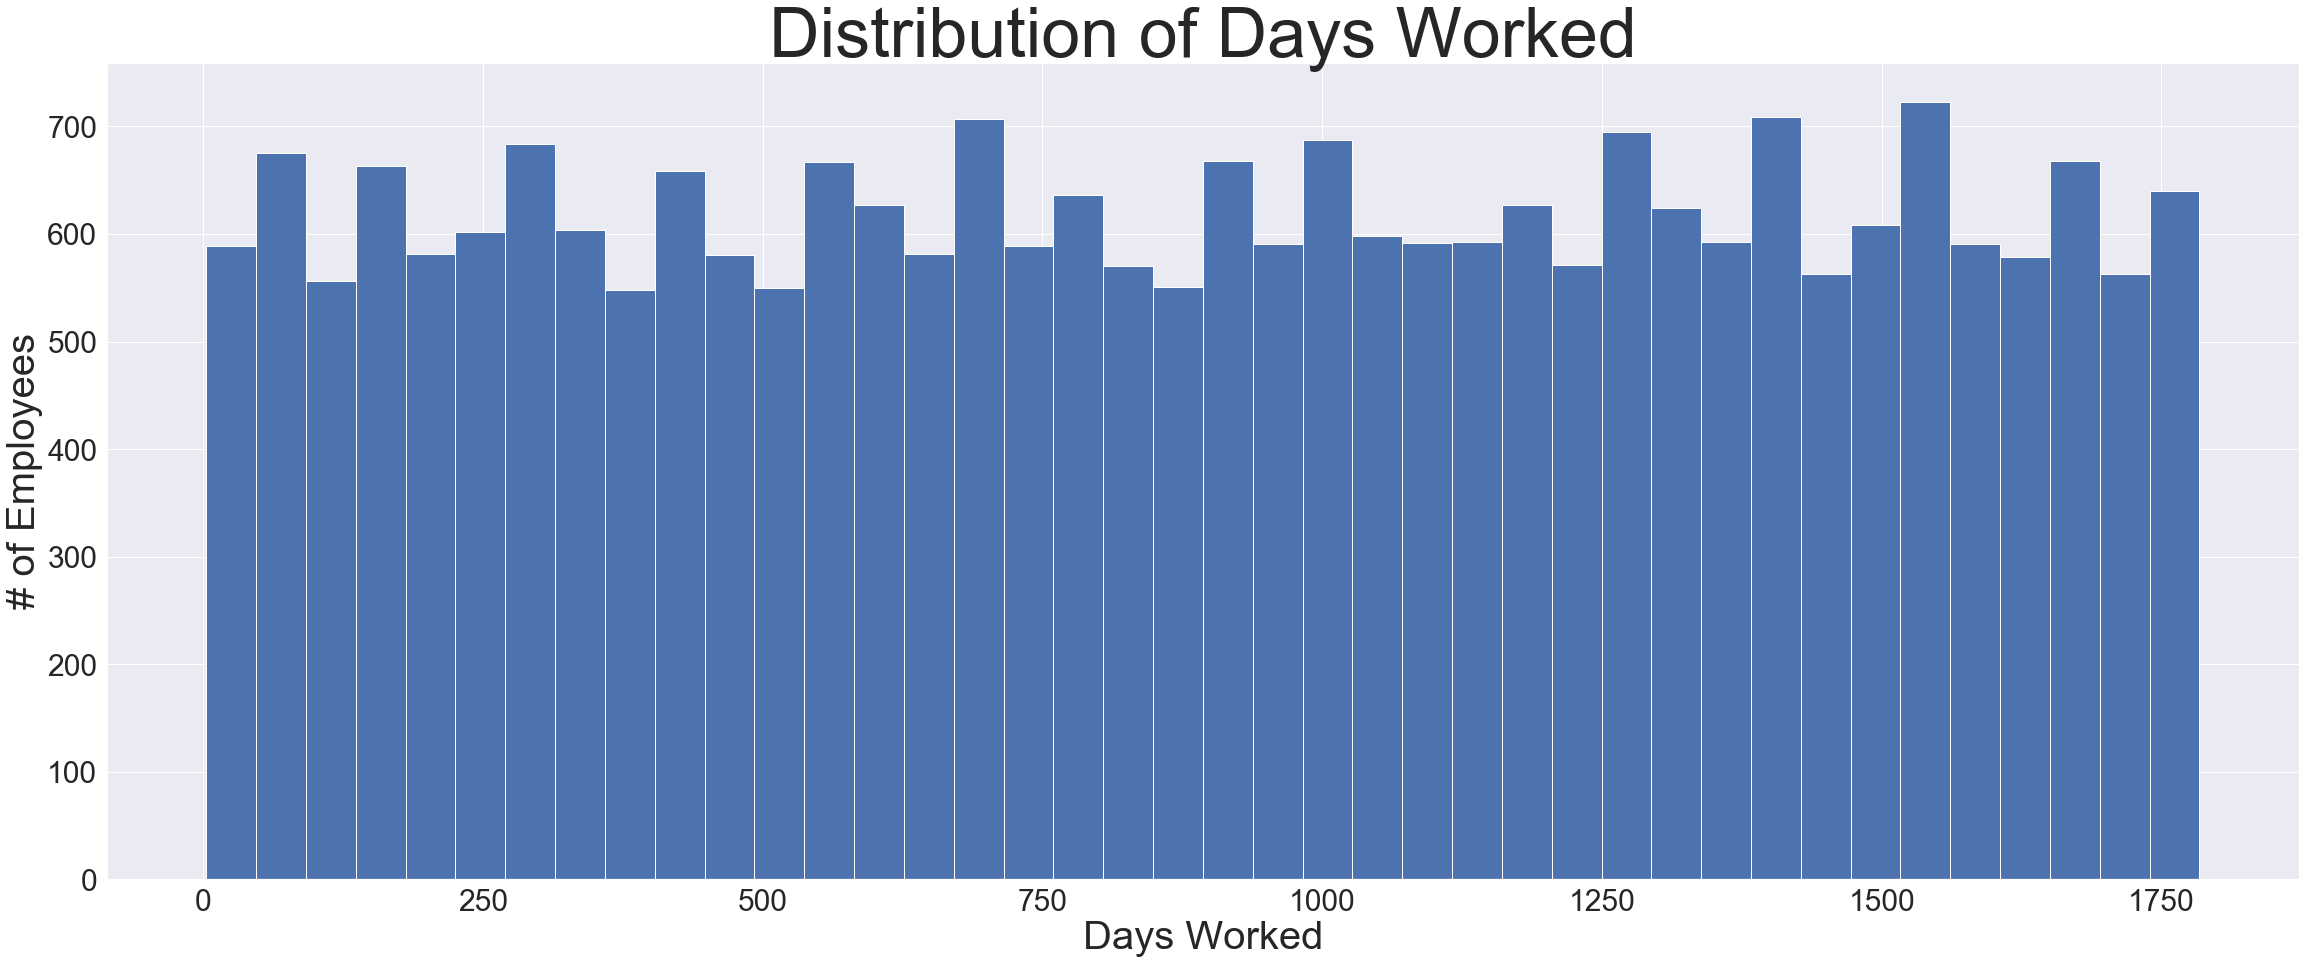

In [413]:
employee_data['days_on_job'].hist(bins=40)
plt.title('Distribution of Days Worked',size = 70)
plt.xlabel('Days Worked', size = 40)
_ = plt.ylabel('# of Employees', size = 40)

## 2.Time segmentation


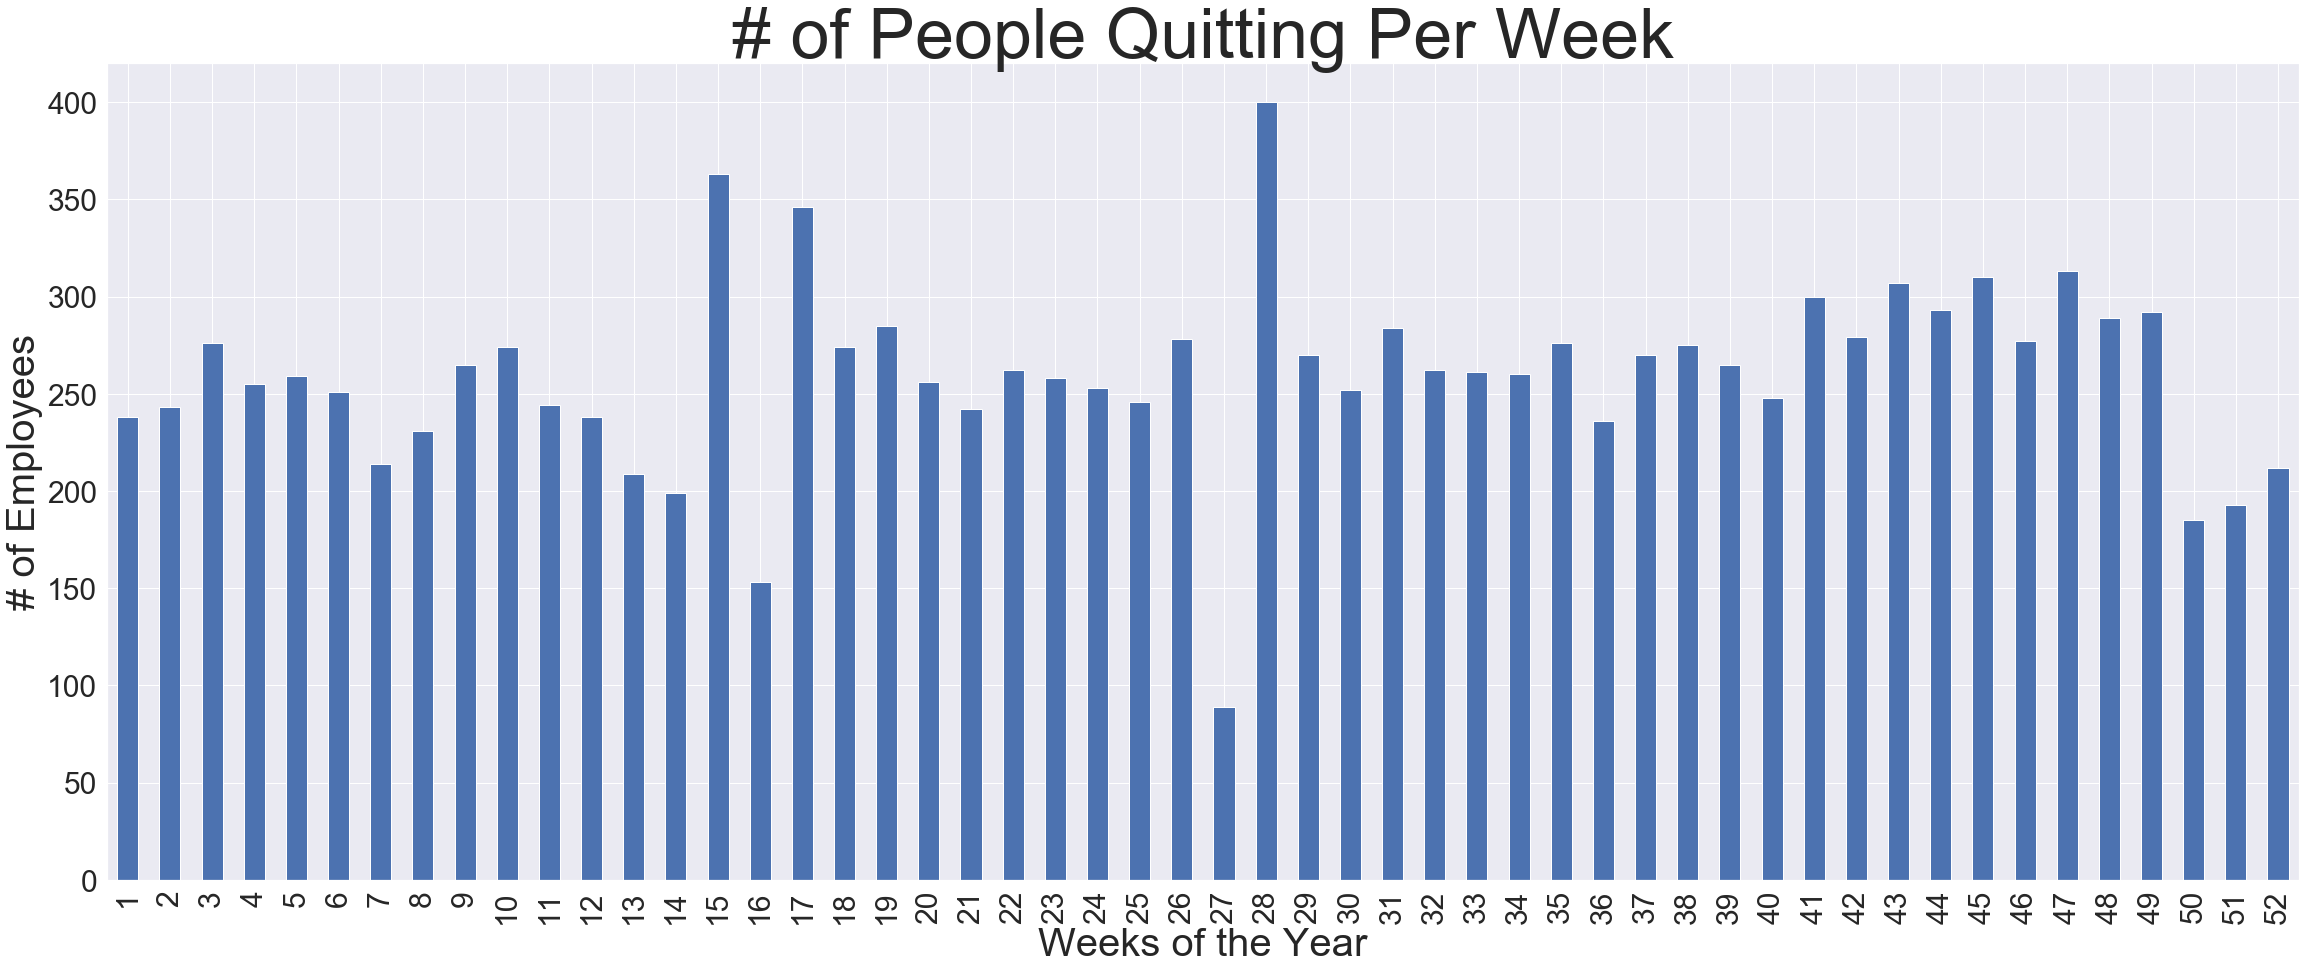

In [414]:
employee_data.groupby('week_quit').sum().quit_or_not.plot(kind = 'bar')
plt.title('# of People Quitting Per Week',size = 70)
plt.xlabel('Weeks of the Year', size = 40)
_ = plt.ylabel('# of Employees', size = 40)

In [415]:
month_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

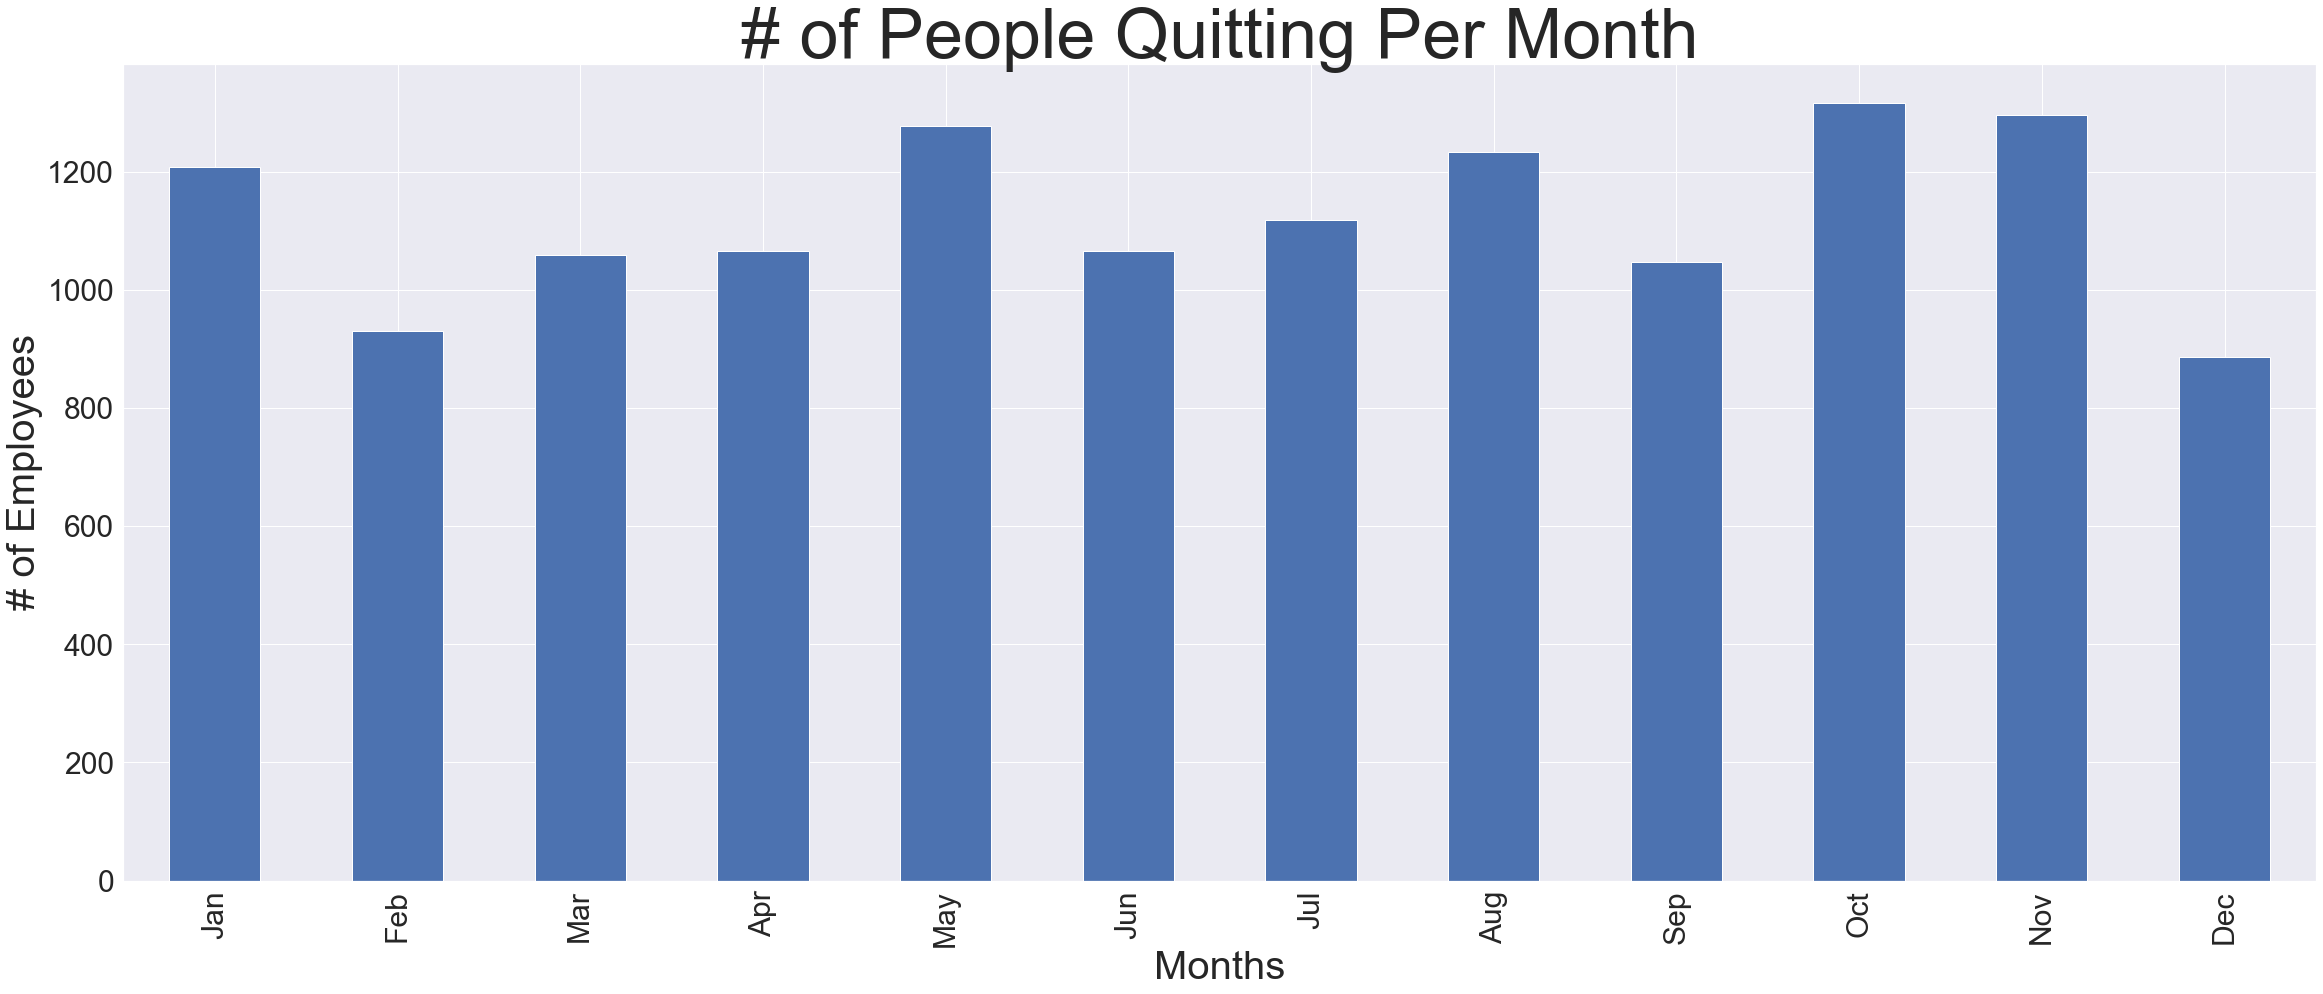

In [416]:
employee_data.groupby('month_quit').sum()['quit_or_not'][month_order].plot(kind = 'bar')
plt.title('# of People Quitting Per Month',size = 70)
plt.xlabel('Months', size = 40)
_ = plt.ylabel('# of Employees', size = 40)

In [417]:
employee_data.groupby('month_quit').sum()['quit_or_not']

month_quit
Apr    1066
Aug    1234
Dec     887
Feb     930
Jan    1209
Jul    1119
Jun    1067
Mar    1060
May    1278
Nov    1296
Oct    1317
Sep    1047
Name: quit_or_not, dtype: int64

## 3. Seniority, Salary, & Department

### a. Seniority

/Users/akhila/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/akhila/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


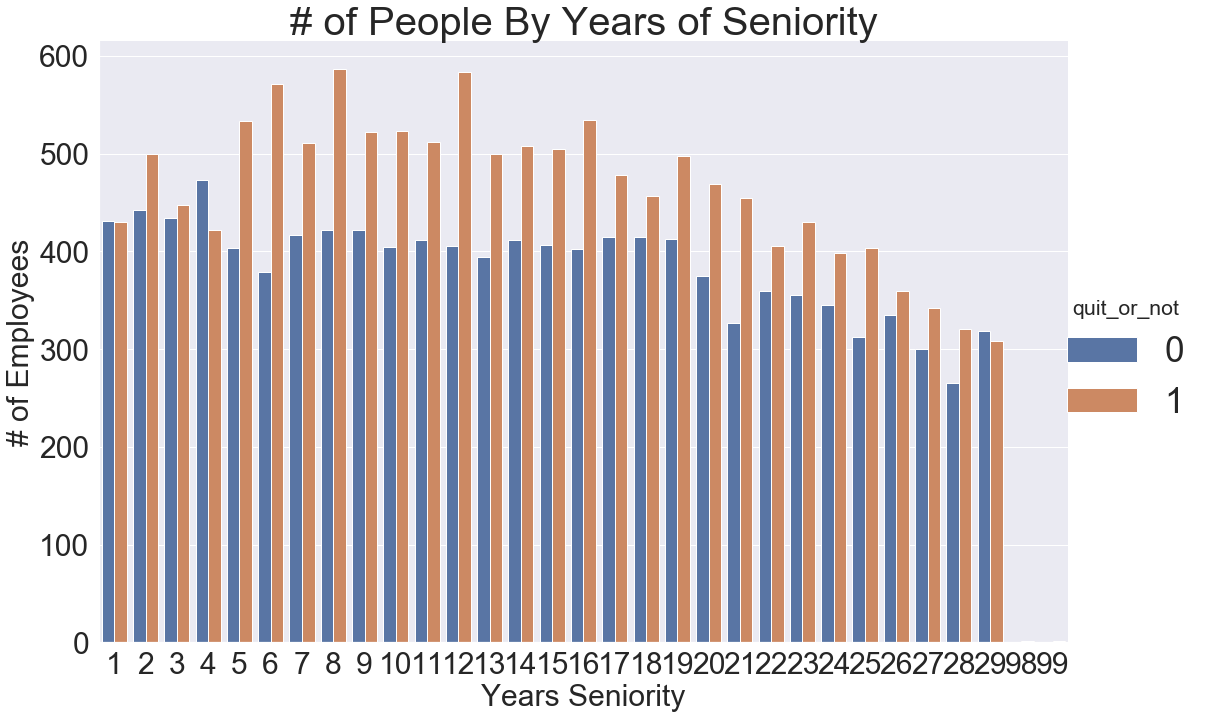

In [418]:
sns.factorplot(x = 'seniority', data = employee_data, kind = 'count', hue = 'quit_or_not', size = 10, aspect = 1.5)
plt.title('# of People By Years of Seniority',size =40)
plt.xlabel('Years Seniority', size = 30)
_ = plt.ylabel('# of Employees', size = 30)

In [419]:
#Removing outliers
employee_data = employee_data[employee_data.seniority < 30]

In [421]:
employee_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_or_not,days_on_job,week_quit,month_quit,day_quit
0,13021,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,629,44,Oct,30
1,5461,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,958,14,Apr,04
2,21162,4,marketing,14,101000.0,2014-10-13,2005-02-25,0,426,8,Feb,25
3,22093,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,1308,23,Jun,07
4,13586,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1518,34,Aug,22


Implementation:


Get the total number of people that quit by seniority level

Get the total number of people that didn't quit by seniority level

Divide the two to get the ratio

Plot the Ratio Over Time

In [422]:
# 1. Get the # of people that Quit
quit_by_seniority_level=employee_data[employee_data['quit_or_not']==1].groupby('seniority').count()['employee_id']

In [423]:
# 2. Get the # of people that Didn't Quit
not_quit_by_seniority_level=employee_data[employee_data['quit_or_not']==0].groupby('seniority').count()['employee_id']

In [424]:
#3. Get the Ratio & Removing the Outliers
seniority_ratios = (quit_by_seniority_level/not_quit_by_seniority_level)

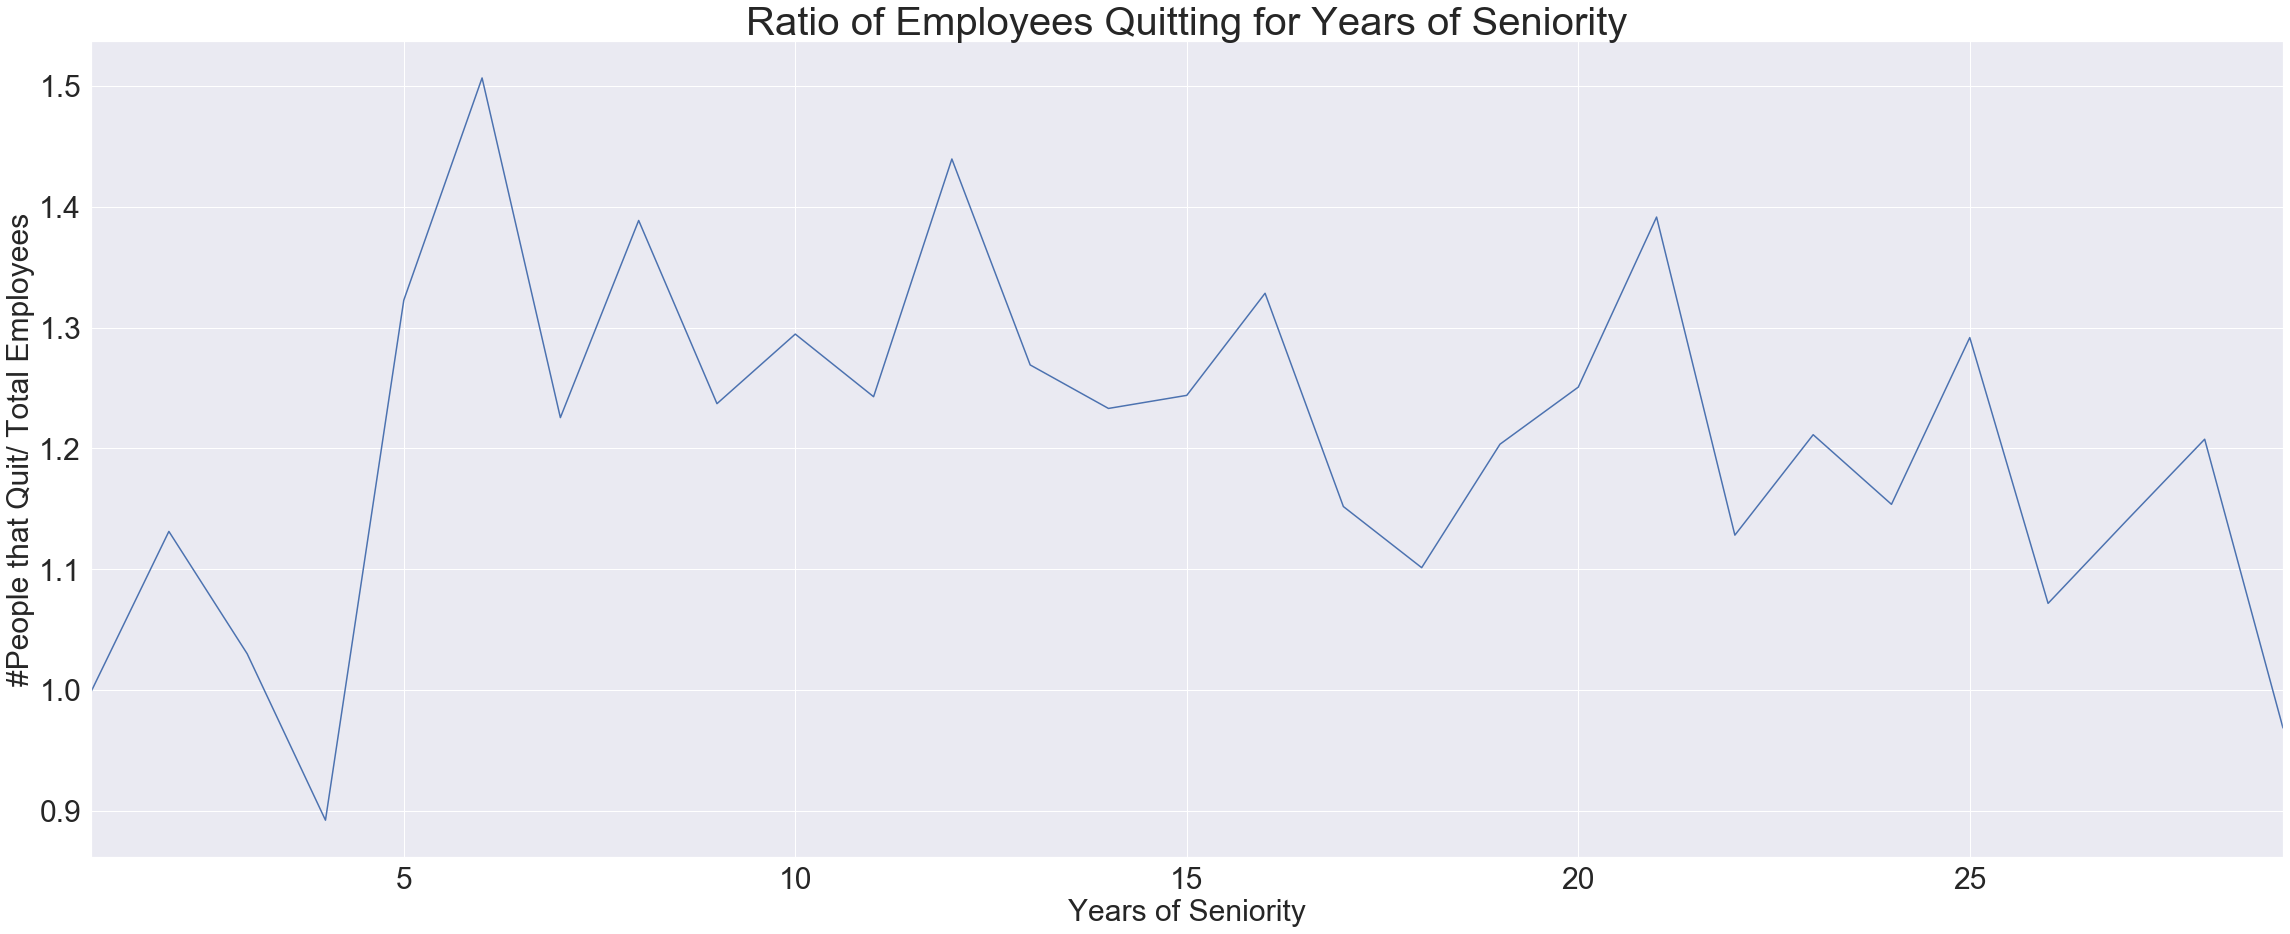

In [425]:
seniority_ratios.plot()
plt.title('Ratio of Employees Quitting for Years of Seniority',size =40)
plt.xlabel('Years of Seniority', size = 30)
_ = plt.ylabel('#People that Quit/ Total Employees', size = 30)

Takeaway:

 1. There is very low quitting rates for people starting off their careers.
 2. That changes after around year 4 where there is a huge spike in people quitting.
 3. There is a gradual drop off after than with each year having less of a ratio quitting.

### b. Salary

Since there are few people that earn high wages we will perform a moving average 

<b>Steps:</b>

Create a moving average function
Groupby the different salaries and get a ratio of people that quit for every salary`


In [ ]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    print(window_size)
    print(np.ones(int(window_size)))
    return np.convolve(interval, window, 'same')

In [430]:
salary_per = employee_data.groupby('salary').sum()
salary_per

,employee_id,company_id,seniority,quit_or_not,days_on_job,week_quit
salary,,,,,,
17000.0,28674,13,2,1,3092,49
18000.0,123554,60,20,3,8666,142
19000.0,119549,81,32,6,8546,237
20000.0,202233,118,52,13,22181,415
21000.0,575793,268,124,20,35588,778
22000.0,1186859,489,237,47,82581,1587
23000.0,1371522,584,265,54,107974,1874
24000.0,1349409,608,275,58,111492,2036
25000.0,1477842,541,267,58,91437,2102


### c. Department

/Users/akhila/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/akhila/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


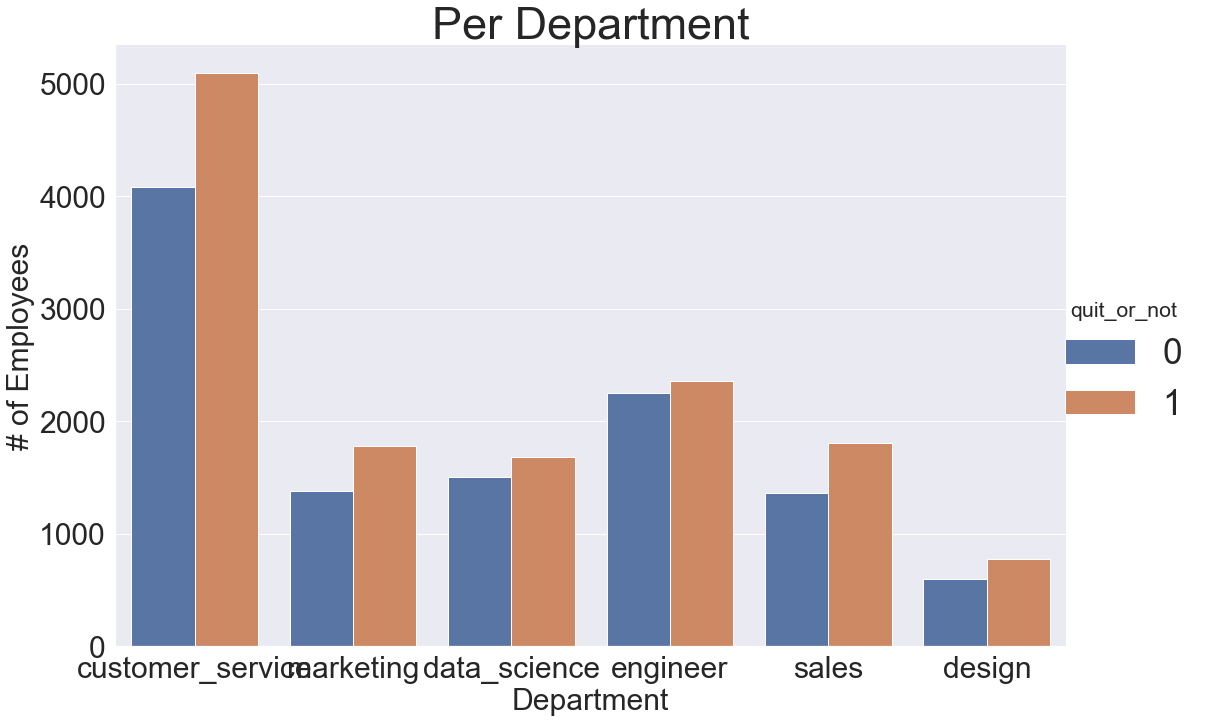

In [433]:
sns.factorplot(x = 'dept', data = employee_data, kind = 'count', hue = 'quit_or_not', size = 10, aspect = 1.5)
plt.title('Per Department',size =45)
plt.xlabel('Department', size = 30)
_ = plt.ylabel('# of Employees', size = 30)

In [442]:
dept=employee_data.groupby('dept').sum()['quit_or_not']

In [444]:
dept=employee_data.groupby('dept').sum()['quit_or_not']/employee_data.groupby('dept').count()['quit_or_not']

In [447]:
dept.sort_values(ascending=False)

dept
sales               0.570933
design              0.563768
marketing           0.562855
customer_service    0.554902
data_science        0.527273
engineer            0.511925
Name: quit_or_not, dtype: float64


<b>Takeaways:</b>

The department with highest ratio of quitting is the sales team.

Customer Service is in the middle but it has the highest number of employees

# 5. Predictive Model

Here we will build a classification model to tell us which features are the most predictive in telling us if an employee will leave. Since seeing that there is a large spike in people that quit within a year, we will zero in on people that quit within a year to understand which people quit during that time.

<b>Steps:</b>

 1.Only use 'early quitter' data.
 
 2.Build a decision tree with the dependent variable being if someone quit or not.
 
 3.Plot Feature Importance.
 
 4.Dive Deeper into the important features to understand why employees quit.

### <b>1. Early Quitter Data</b>

In [450]:
early_df = employee_data[employee_data.days_on_job <= 365]

### 2.Build Predictive Model

In [455]:
from patsy import dmatrices

In [456]:
formula = 'quit_or_not ~ seniority+ salary+ dept + company_id'

In [457]:
y, X = dmatrices(formula, early_df)

In [458]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [459]:
rf = DecisionTreeClassifier()

In [460]:
rf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [461]:
rf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [463]:
temp = pd.DataFrame({'importance':rf.feature_importances_, 'feature': X.design_info.column_names}).sort_values('importance', ascending = False)

In [464]:
temp

,importance,feature
7,0.493968,salary
6,0.326360,seniority
8,0.138580,company_id
3,0.016229,dept[T.engineer]
5,0.007721,dept[T.sales]
4,0.006977,dept[T.marketing]
2,0.006525,dept[T.design]
1,0.003640,dept[T.data_science]
0,0.000000,Intercept


## Plot Feature Importance

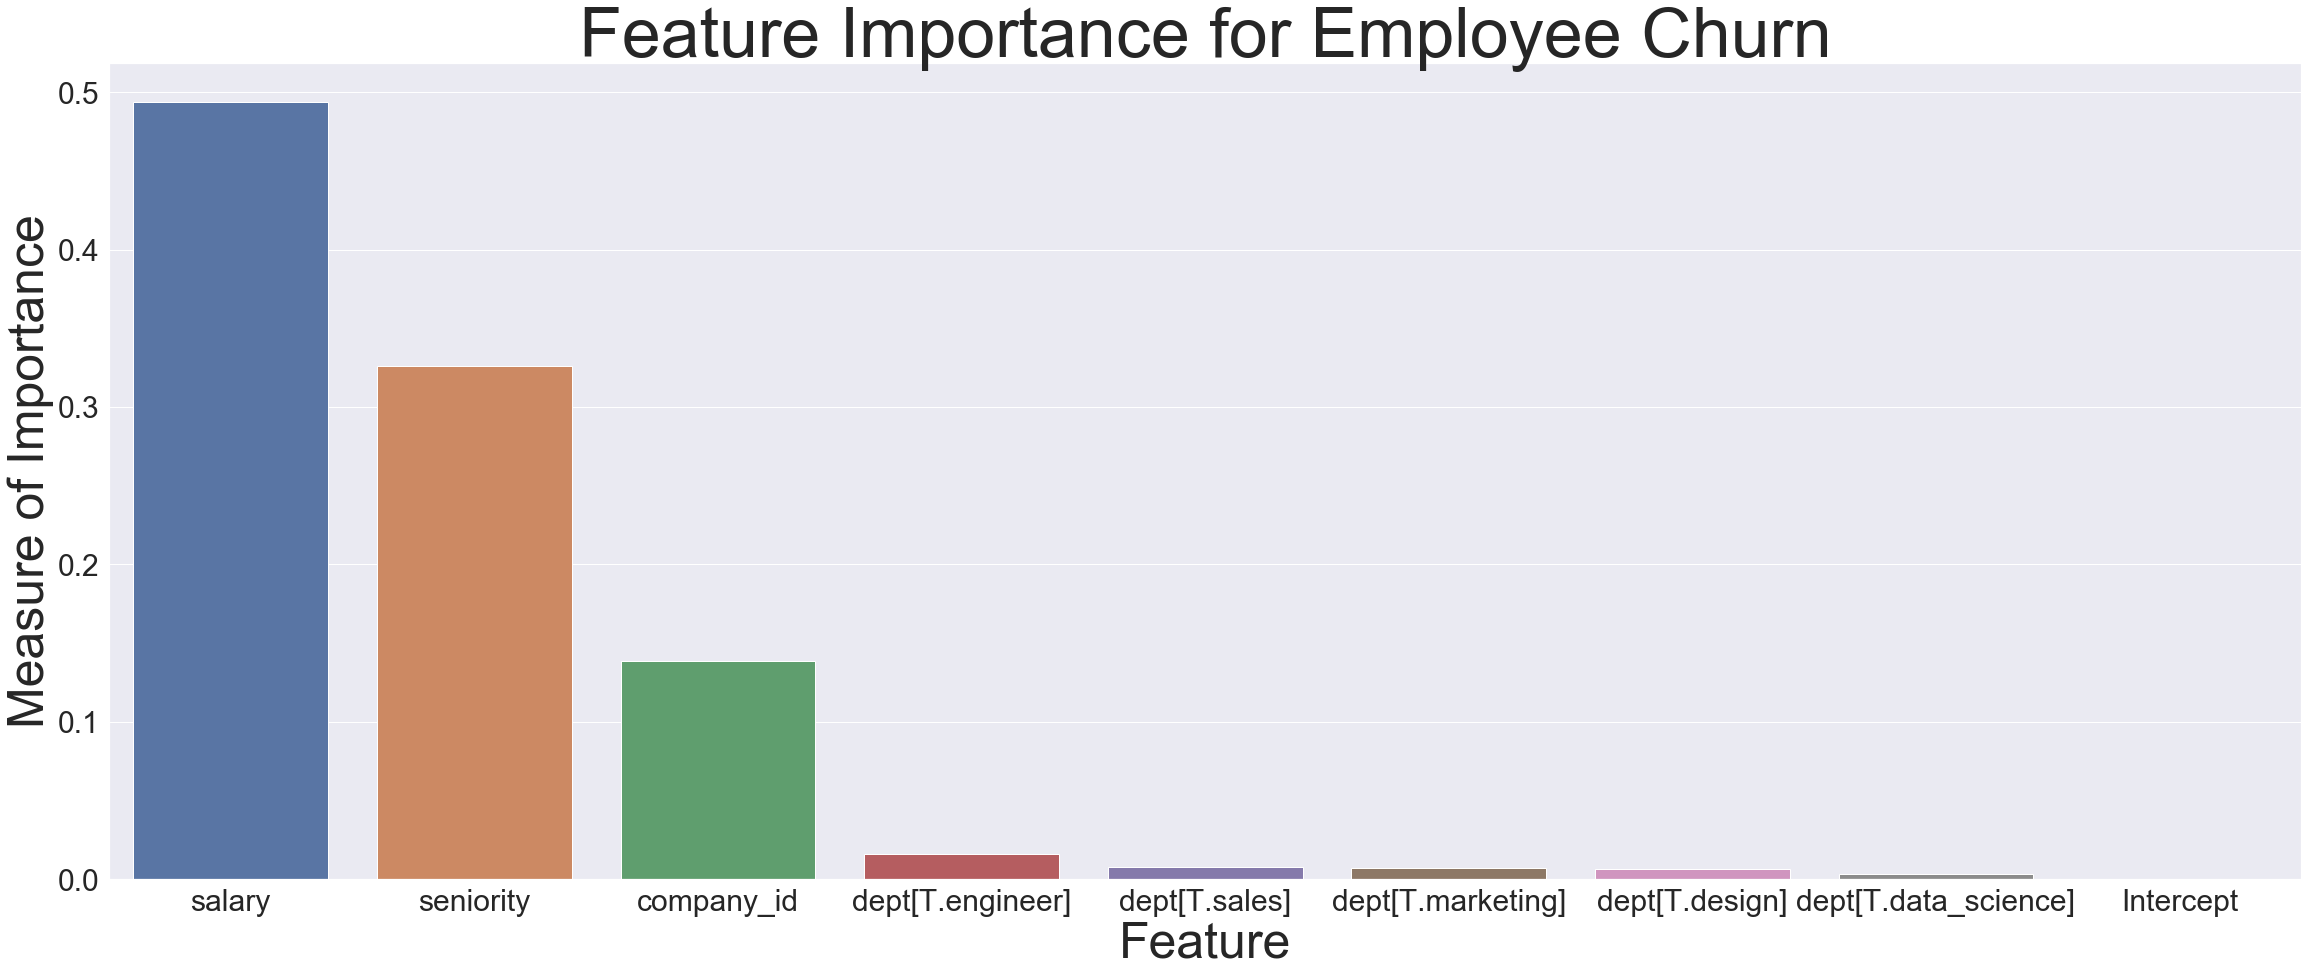

In [466]:
_ = sns.barplot(x = 'feature', y = 'importance', data = temp)
plt.title('Feature Importance for Employee Churn',size =70)
plt.xlabel('Feature', size = 50)
_ = plt.ylabel('Measure of Importance', size = 50)

Takeaways:


Salary is the most predictive feature in predicting if someone will quit

Seniority is the second which we already saw that people quit less the more seniority they have

Company ID is third which means that some companies do better than others.